In [1]:
#https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline



In [3]:
dataset = pd.read_csv("Iris.csv")

In [6]:
ido = pd.DataFrame([i for i in range(10)]*15)

In [9]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
dataset.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
dataset.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

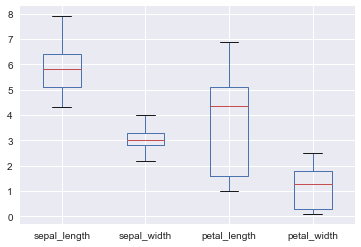

In [19]:
dataset.plot(kind="box",sharex=False,sharey=False)

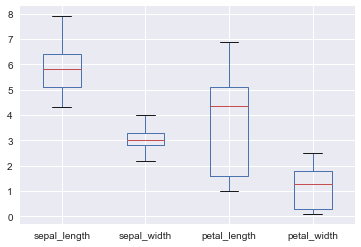

In [22]:
dataset.plot(kind="box",sharex=True,sharey=True)

In [23]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8652D3898>,
      dtype=object)

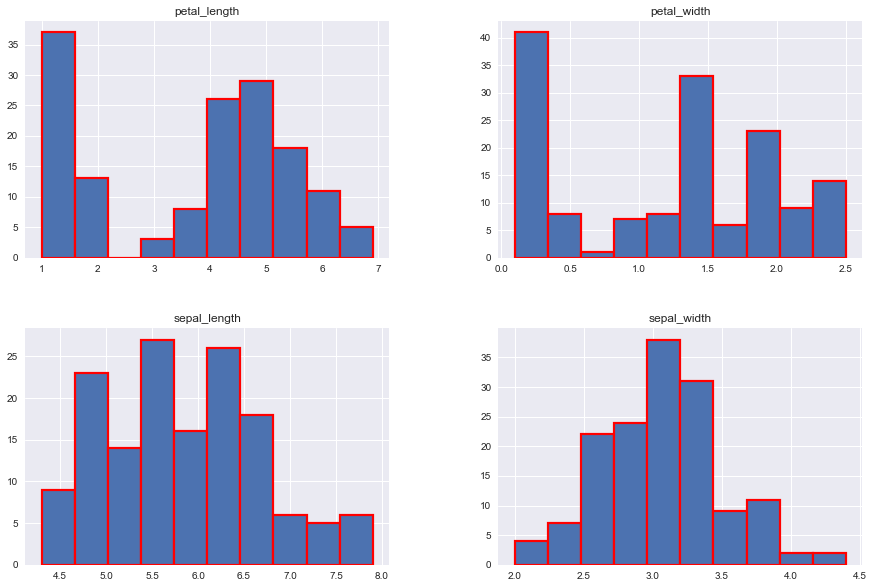

In [36]:
dataset.hist(edgecolor="red",linewidth=2.2,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B865B546D8>,
      dtype=object)

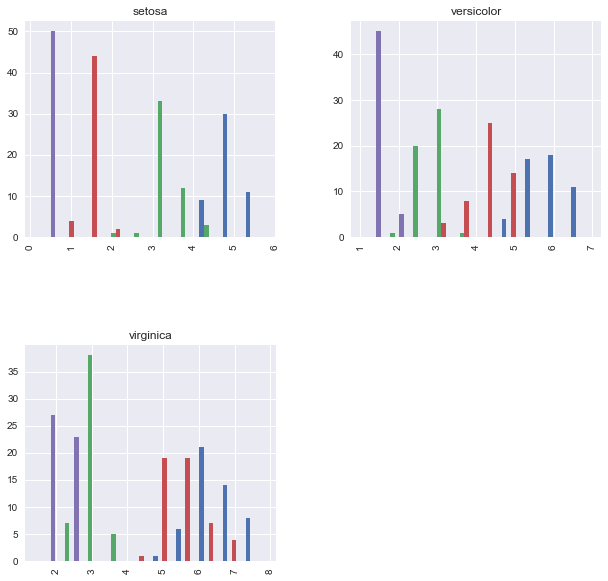

In [39]:
dataset.hist(by="species",figsize=(10,10))

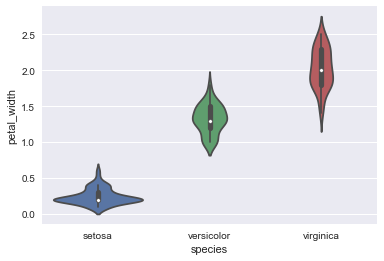

In [43]:
sns.violinplot(data=dataset,x="species",y="petal_width")

In [44]:
from pandas.plotting import scatter_matrix

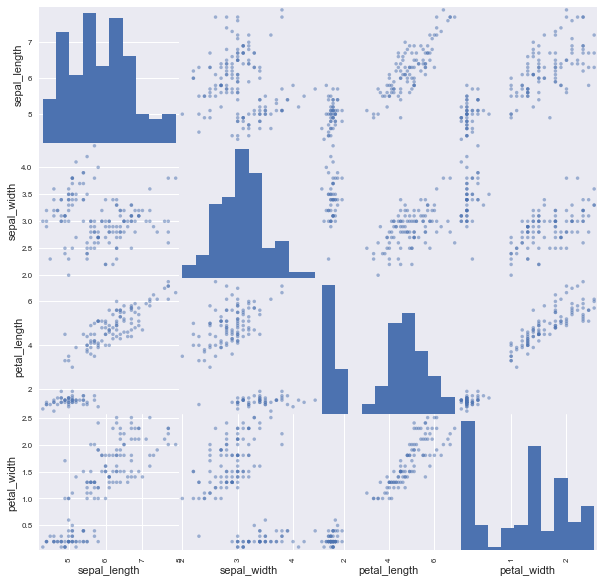

In [47]:
scatter_matrix(dataset,figsize=(10,10))
plt.show()

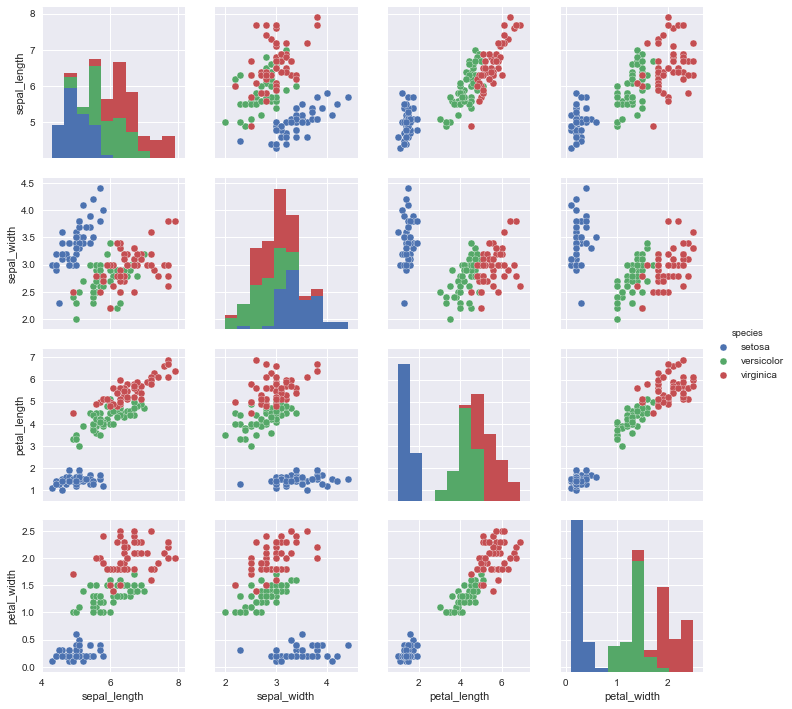

In [48]:
sns.pairplot(dataset,hue="species")

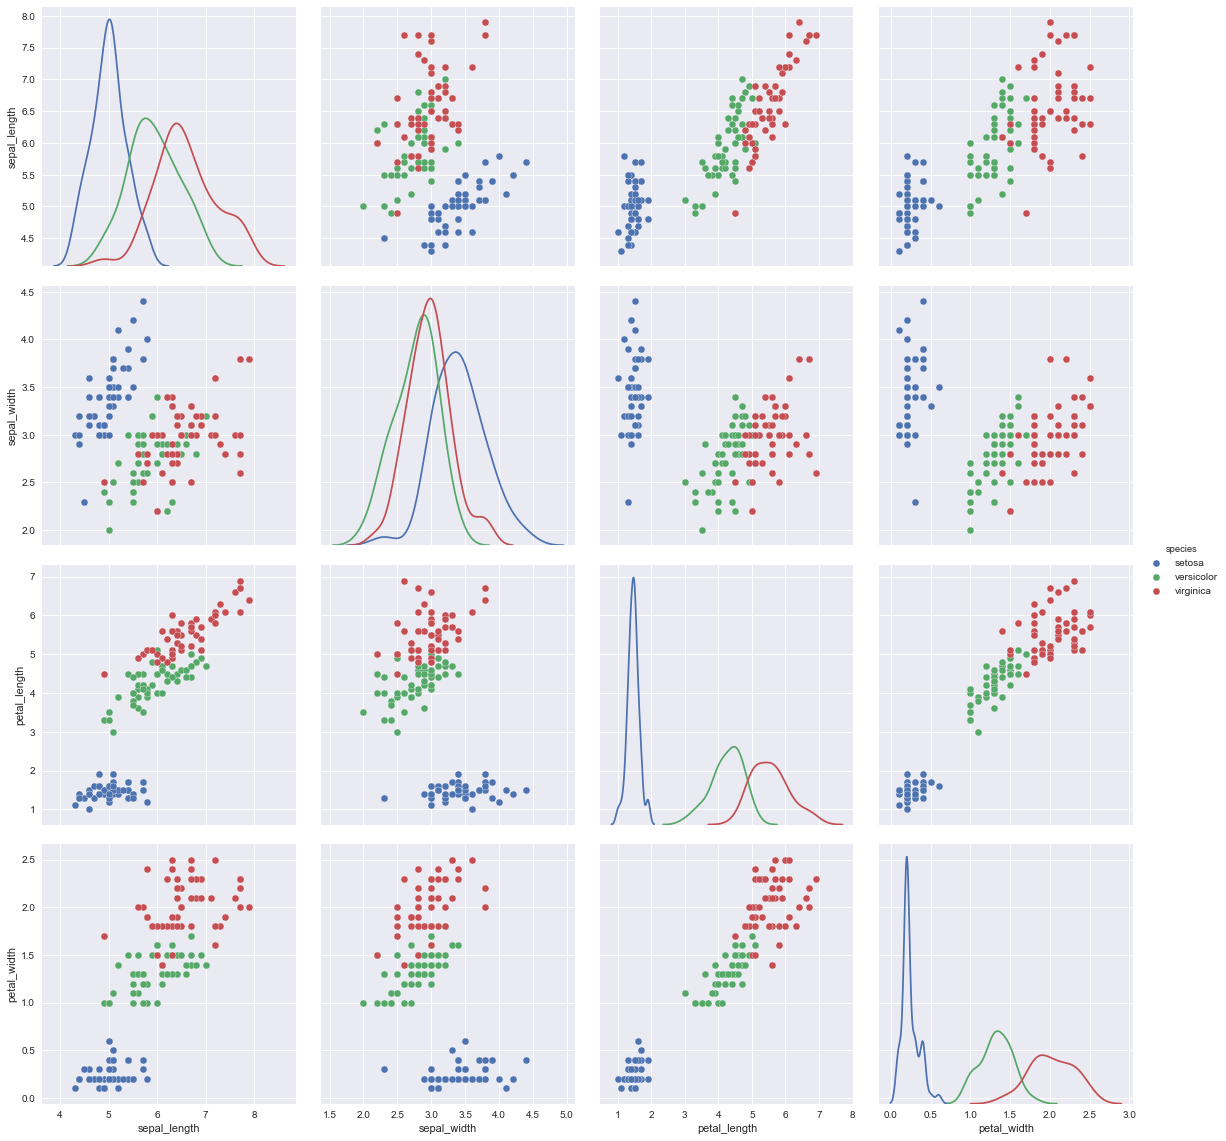

In [50]:
sns.pairplot(dataset,hue="species",diag_kind="kde",size=4.0)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

C:\Users\oztur\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((30, 4), (120, 4), (120,), (30,))

In [70]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
y_pred=classifier.predict(X_test)

In [78]:
X_test[:,1]

array([2.8, 2.2, 4.2, 2.9, 3.4, 3.3, 3.5, 3.1, 2.8, 2.8, 2.6, 3.2, 2.8,
       2.8, 2.9, 3.1, 2.9, 2.6, 3. , 3.9, 2.8, 3. , 3.4, 2.9, 2.8, 3.6,
       3.8, 2.9, 2.3, 3.4])

In [72]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [79]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      0.92      0.96        13
  virginica       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [80]:
from sklearn.metrics import accuracy_score
print("accuracy is",accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


In [81]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [82]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [155]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
print("accuracy is",accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [85]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)

In [87]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [88]:
y_pred = classifier.predict(X_test)

In [92]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy is",accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [94]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


In [95]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30



In [98]:
print(confusion_matrix(y_test,y_pred))
print("accuracy score",accuracy_score(y_pred,y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy score 1.0
